In [1]:
# Analiza i modyfikacja danych
import pandas as pd
import numpy as np
import random as rnd
import category_encoders as ce
# Wizualizacja
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Ewaluacja
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(font_scale=1.5)

In [3]:
# wczytujemy dane
train_df = pd.read_csv('Data/train.csv')
train_df = train_df.drop(['PassengerId'], axis=1)

## Nasz zbiór Dane o pasażerach Titanic'a
| Zmienna | Definicja | Klucz |
|---------|-----------|-------|
|Survival| Czy ktoś przeżył|0 = Nie, 1 = Tak|
|pclass| Jakiej klasy bilet posiadał |1-pierwsza 2-druga 3-trzecia|
|Sex|płeć||
|Age|wiek||
|Sibsp|liczba rodzeństwa/małżonków na statku||
|Parch|Liczba rodziców/dzieci na statku||
|Ticket|numer biletu||
|Fare|opłata pasażerska||
|Cabin|Numer kabiny||
|Embarked|Port na którym dana osoba wsiadła| C = Cherbourg, Q = Queenstown, S = Southampton|


In [4]:
# sprawdzamy jakie kolumny występują w naszych danych
print(train_df.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
# podglądamy pierwsze 5 wyciągów z tabeli
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# sprawdzamy ile mamy nie uzupełnionych pól w Danych
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


## Podział zmiennych 
* Ilościowe (Numerical Variables) np. Wzrost, koszt mieszkania, liczba uczestników.
* Zmienne Kategoryczne (Categorical Variables)
    * Nominalne (Nominal Variables) zwane też zmiennymi jakościowymi nie uporządkowanymi np. marka samochodu
    * Uporządkowane (Ordinal Variable) np. wykształcenie, twardość materiału

In [7]:
# Patrzymy jaka jest średnia, odchylenie standardowe oraz kwartyle naszych danych liczbowych
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Sprawdzamy jak wyglądają dane Kategoryczne
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",male,1601,B96 B98,S
freq,1,577,7,4,644


# Co to [korelacja](https://pl.wikipedia.org/wiki/Korelacja)?

Korelację między dwoma zmiennymi X i Y wyliczamy następująco:
$$r_{XY}\frac{cov(X,Y)}{\sigma(X)\sigma(Y)}$$
Gdzie $\sigma(X)$ to odchylenie standardowe zmiennej X 
a cov(X,Y) to kowariancja zmiennych X i Y wyrażona wzorem:
$$cov(X,Y) = E(X\cdot Y)-EX\cdot EY$$
Gdzie EX to wartość oczekiwana X

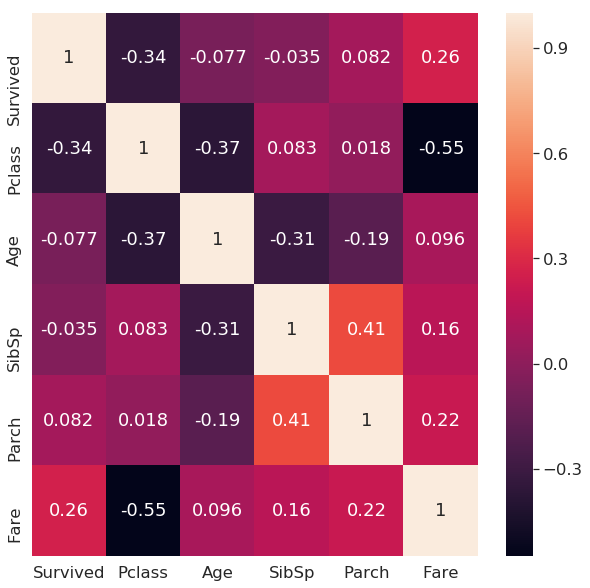

In [9]:
# patrzymy jak skorelowane są dane numeryczne
sns.heatmap(train_df.corr(), annot=True)

In [10]:
# Patrzymy jaki procent osób z każdej klasy przeżył
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
# Sprawdzamy jaki procent mężczyzn oraz kobiet przeżył
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',
                                                                                  ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# Grupujemy ludzi ze względu na liczbę rodzeństwa/małżonków i sprawdzamy jaki procent przeżył
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',
                                                                                      ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# Grupujemy ludzi ze względu na liczbę rodziców/dzieci i sprawdzamy jaki procent przeżył
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',
                                                                                      ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


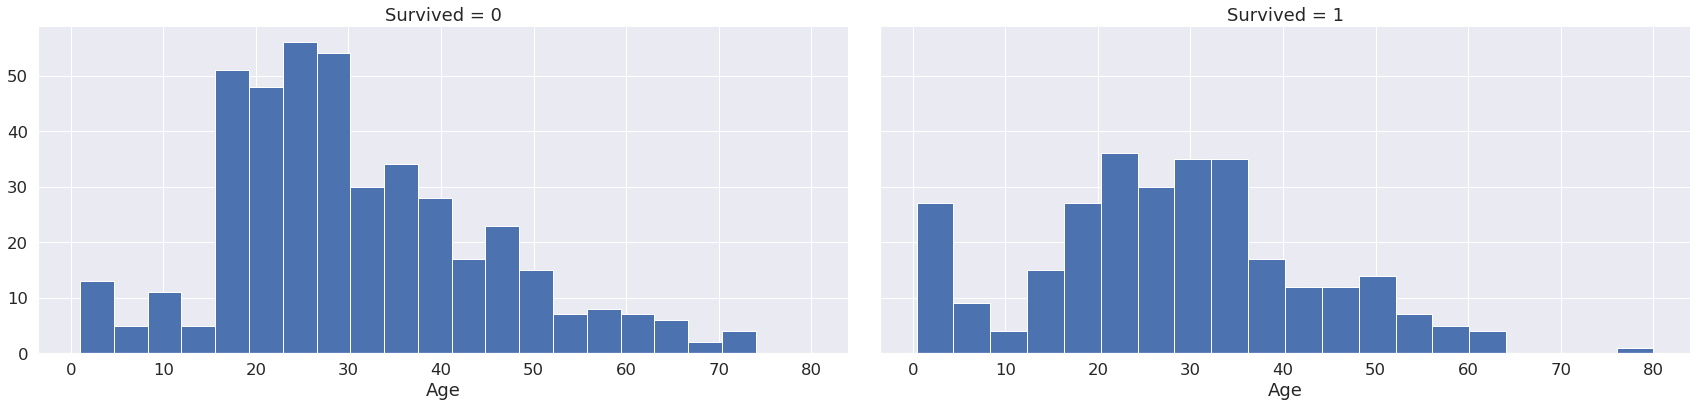

In [14]:
# Wykreślamy rozkład wieku osób, które przeżyły i nie
g = sns.FacetGrid(train_df, col='Survived', height=6, aspect=2)
g.map(plt.hist, 'Age', bins=20);

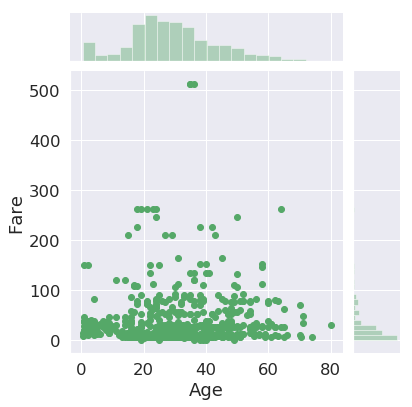

In [15]:
# Wykreślamy wykres zależności wieku od opłaty pasażerskiej wraz z rozkładami obu zmiennych
sns.jointplot(x='Age', y='Fare', data=train_df, color='g');

# Co To [BoxPlot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)?

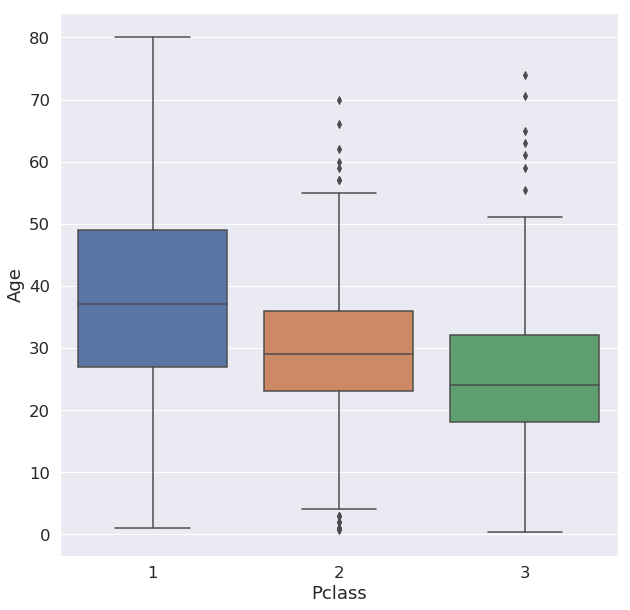

In [16]:
# Wykreślamy Box Ploty
sns.boxplot(x='Pclass', y='Age', data=train_df);

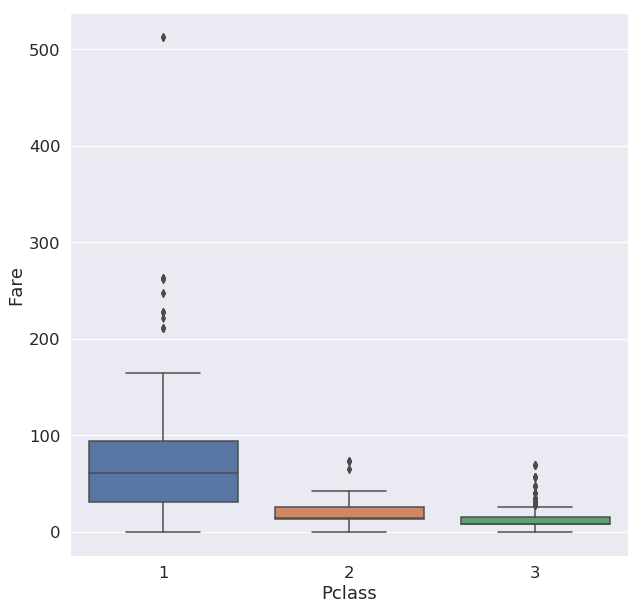

In [17]:
sns.boxplot(x='Pclass', y='Fare', data=train_df);

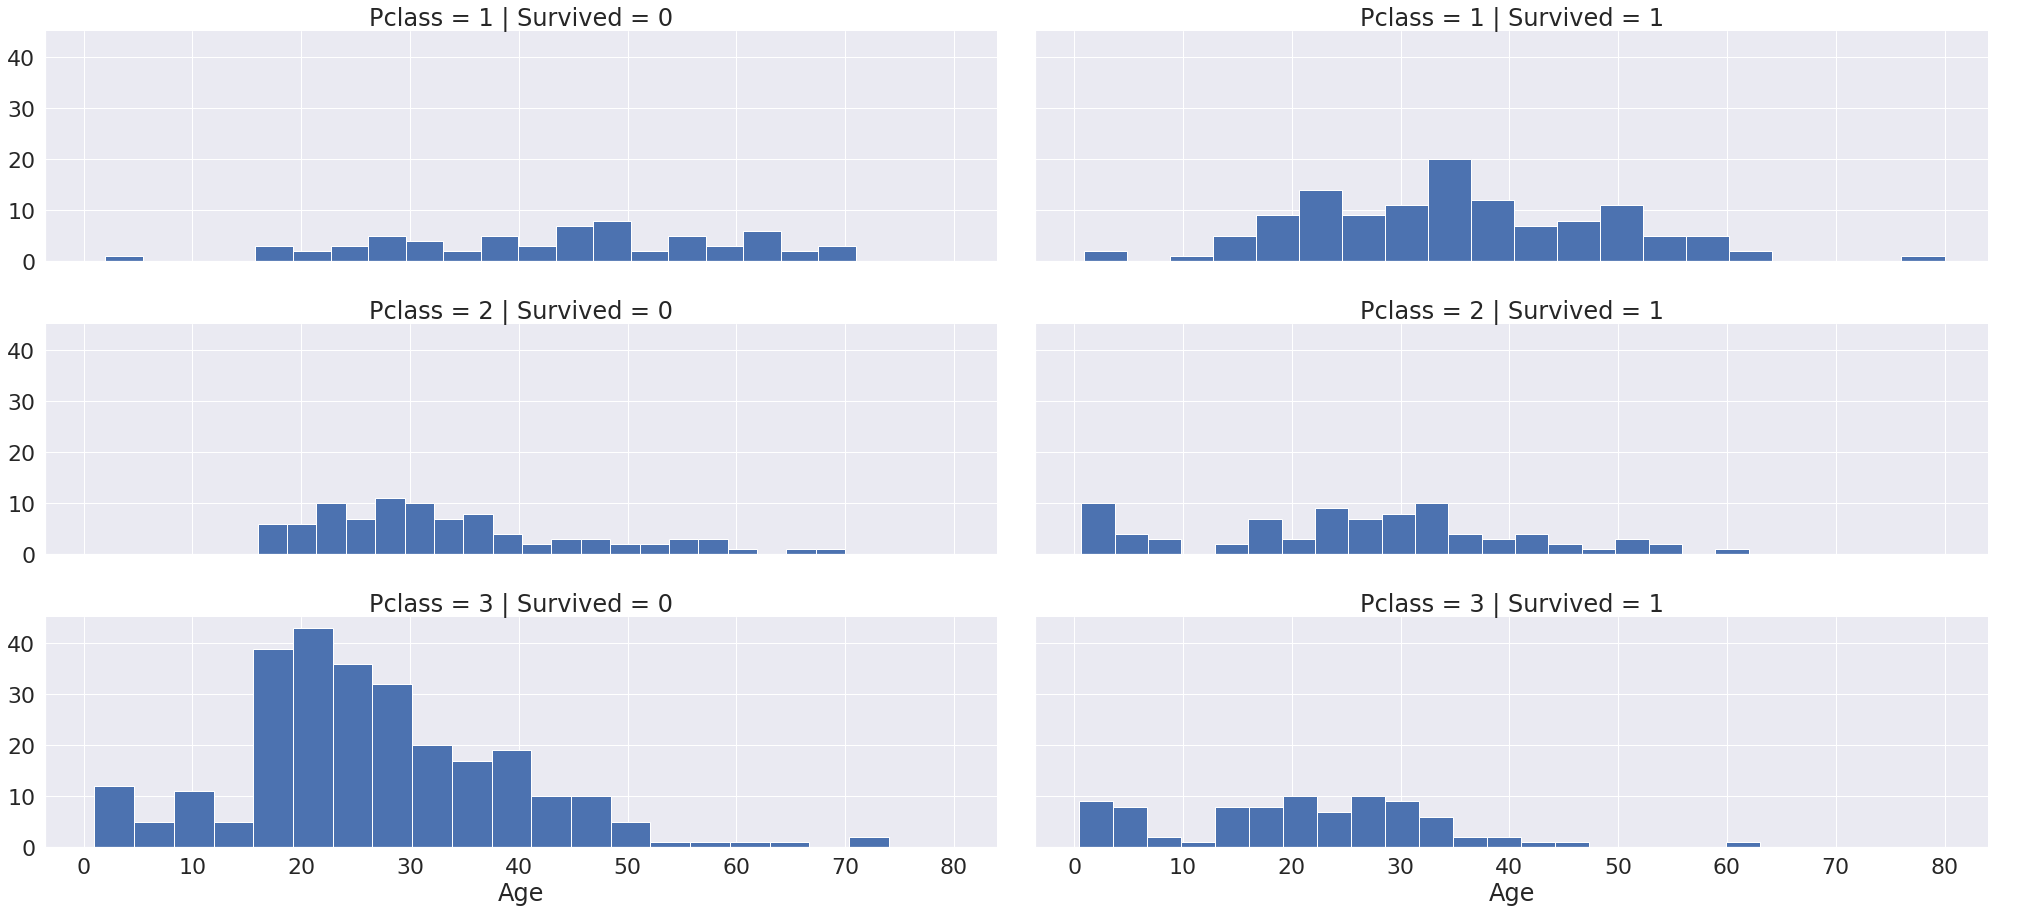

In [18]:
# Wykreślamy rozkłady dla róznych klas biletu
sns.set(font_scale=2)
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=4.4, aspect=3.2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

/home/hakunamatata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hakunamatata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


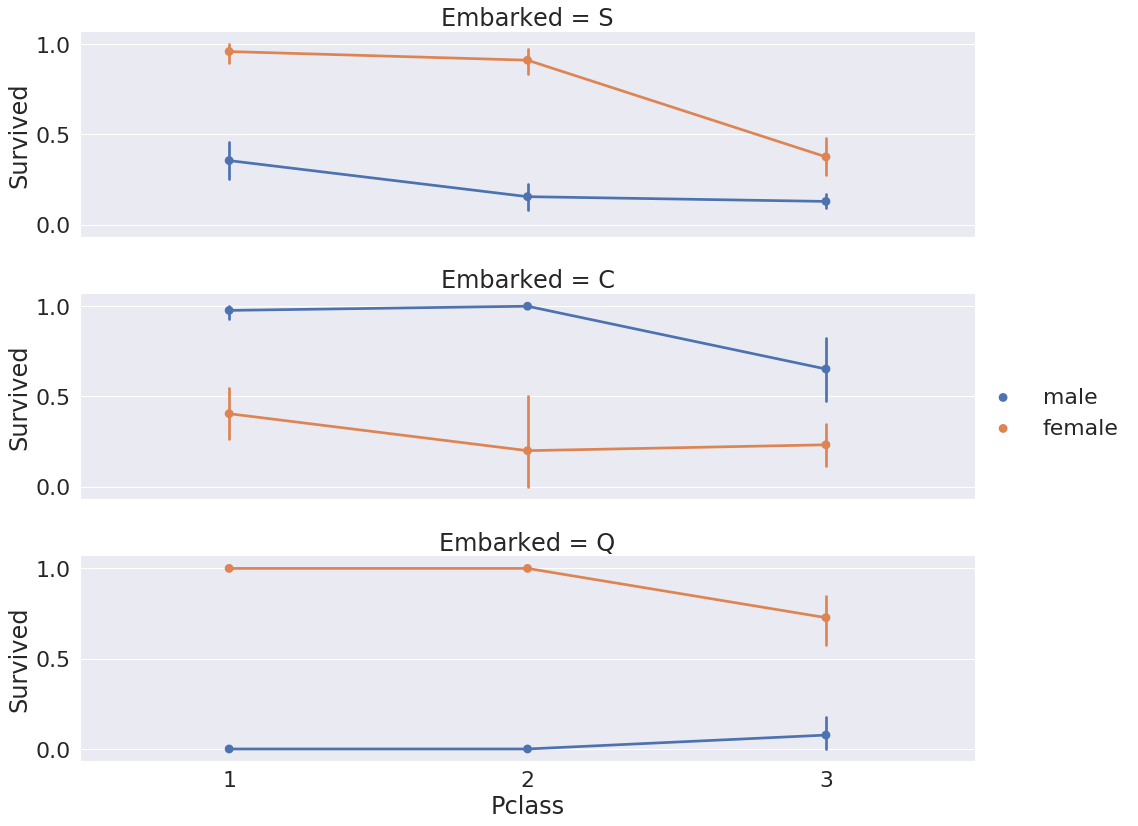

In [19]:
# Wykreślamy wykresy przeżycia w zależności od klasy pasażerskiej dla różnych miejsc,
# w których pasażerowie wsiedli
grid = sns.FacetGrid(train_df, row='Embarked', height=4, aspect=3.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend();

In [20]:
# Dane o bilecie oraz kabinie nic nie wnoszą co do przeżycia więc je odrzucamy
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)

In [21]:
# wydobywamy z imion przedrostki typu Mr, Ms, Master itd.
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
# Zastępujemy rzadko występujące przedrostki nazwą Other oraz poprawiamy inne przedrostki
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir',\
                                                 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
# Wyliczamy średnie przeżycie dla róznych tytułów    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [23]:
# Odrzucamy imię ponieważ już nic nie wnosi.
train_df = train_df.drop(['Name'], axis=1)

In [24]:
# Wyciągamy zmienną którą nasz model będzie przewidywał
Y = train_df['Survived'].values

In [25]:
train_df = train_df.drop(['Survived'], axis=1)

In [26]:
# Sprawdzamy ile danych nam brakuje w każdej kolumnie
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [27]:
# uzupełniamy wiek średnią
age_mean = np.mean(train_df['Age'])
train_df['Age'] = train_df[['Age']].fillna(age_mean)

# pozostałe zastępujemy flagą missing
train_df = train_df.fillna('missing')

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
None


In [28]:
# Kodujemy zmienne kategoryczne
categoricals = list(train_df.select_dtypes(include=['O']).columns) + ['Pclass']
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(train_df[categoricals])
# Tworzymy data frame z zakodowanymi zmiennymi a następnie dodajemy go do naszego
# i usuwamy zmienne niezakodowane
train_ohe = pd.DataFrame(encoded, columns=np.hstack(encoder.categories_))
train_df = pd.concat((train_df, train_ohe), axis=1).drop(categoricals, axis=1)

In [29]:
# Dokonujemy podziału danych na zbiór uczący i testujący
X = train_df.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [30]:
# Tworzymy nasz model i uczymy go na danych uczących
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
# Dajemy naszemu modelowi dane do przewidzenia i porównujemy wyniki z rzeczywistymi
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f_score = f1_score(y_test, pred)

# Czym tak naprawdę są te metryki?
* True Positive (TP) - liczba poprawnie przewidzianych 1 przez model
* False Positive (FP) - ile razy model przewidział 1 kiedy rzeczywista wartość to 1
* True Negative (TN) - liczba poprawie przewidzianych 0 przez model
* False Negative (FN) - ile razy model przewidział 0 kiedy rzeczywista wartość to 1
* Condition Positive (P) - liczba prawdziwych 1 w danych
* Condition Negative (N) - liczba prawdziwych 0 w danych
* Accuracy = $\frac{TP+TN}{P+N}$
* Recall (True Positive Rate/sensitivity) = $\frac{TP}{TP+FN}$
* Precision = $\frac{TP}{TP+FP}$
* Fscore (Harmonic mean of precision and recall)= $\frac{2TP}{2TP+FP+FN}$

### Macierz pomyłek Confusion Matrix

|-|Predykcja|-|
|-|-|-|
|Rzeczywiste wartości|0|1|
|0|TN|FP|
|1|FN|TP|
|-|0|1|

Accuracy: 0.7597765363128491
Precision: 0.6323529411764706
Recall: 0.7049180327868853
F1_score: 0.6666666666666666


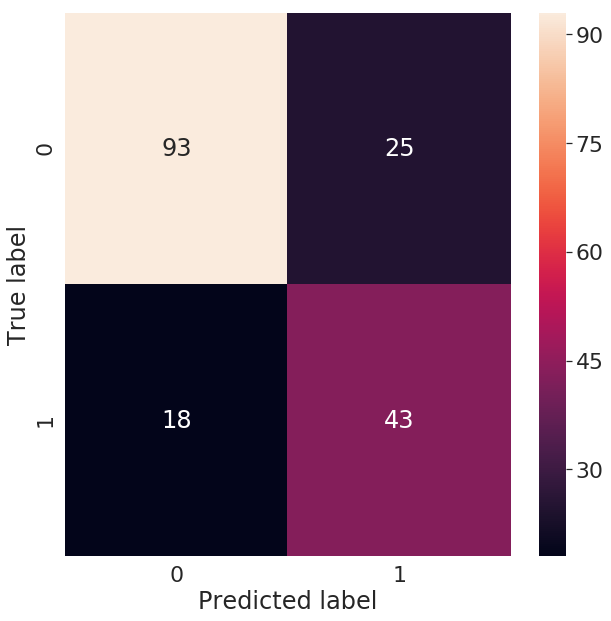

In [32]:
# Wyświetlamy macierz pomyłek oraz wartości
print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
        acc, precision, recall, f_score))
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

Accuracy: 0.8435754189944135
Precision: 0.7796610169491526
Recall: 0.7540983606557377
F1_score: 0.7666666666666666


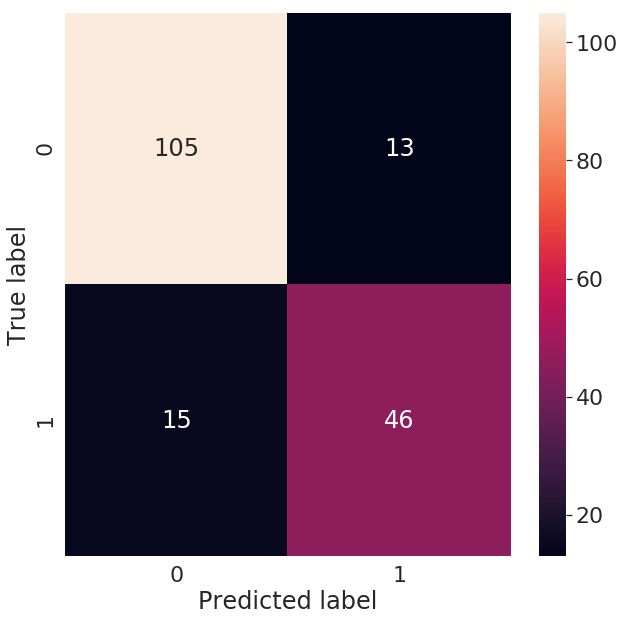

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, pred)
acc = accuracy_score(y_test, pred)
precision, recall, fscore = precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)

print('Accuracy: {}\nPrecision: {}\nRecall: {}\nF1_score: {}'.format(
        acc, precision, recall, fscore))
sns.heatmap(cm, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

# Co dalej?
* [Poradnik do Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
* [Auc/Roc](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
* [Jak działa drzewo decyzyjne](https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248)
* [Bardziej zaawansowne metody w Pandas](https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086)
* [Wizualizacja](https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d)